# GPTChallenge: diagnóstico a partir de HCE

Vamos a trabajar con el corpus CodEsp (textos de historial clínico etiquetados con sus códigos CIE-10 Diagnóstico)

In [1]:
import pandas as pd
import os, re
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer

pd.options.display.max_colwidth = None

In [16]:
#los códigos están en un TSV con un código por línea
train_diag = pd.read_csv("data/train/train.tsv", sep="\t", header=None, names=["archivo", "codigo"])
train_diag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8316 entries, 0 to 8315
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   archivo  8316 non-null   object
 1   codigo   8316 non-null   object
dtypes: object(2)
memory usage: 130.1+ KB


In [17]:
train_diag['codigo'].value_counts()

codigo
r52        163
r69        150
r50.9      142
i10        116
r59.9       95
          ... 
d37.030      1
c79.71       1
g25.0        1
l76.3        1
n81.2        1
Name: count, Length: 2194, dtype: int64

In [18]:
#cogemos la categoría superior de cada código y las agrupamos
train_diag['cat'] = train_diag['codigo'].str.extract(r'(\w\d\d)')
print(train_diag['cat'].value_counts())
train_diag['cat'].nunique()

cat
r52    163
r10    163
r59    160
r69    150
r50    144
      ... 
c31      1
d62      1
s53      1
s34      1
n81      1
Name: count, Length: 918, dtype: int64


918

In [19]:
categories=train_diag['cat'].value_counts()[:10]
top_categorias = categories.index.to_list()
print(top_categorias)

['r52', 'r10', 'r59', 'r69', 'r50', 'r60', 'i10', 'r11', 'n28', 'd49']


In [6]:
type(train_diag['cat'])

pandas.core.series.Series

In [7]:
#seleccionamos sólo las etiquetas de este subconjunto
train_diag = train_diag[np.isin(train_diag['cat'], top_categorias)]

In [8]:
#cargamos los dos conjuntos de train
path = 'data/train/text_files_en/'

corpus = []
for f in [f for f in os.listdir(path) if f.endswith('.txt')]:
    with open(os.path.join(path, f), encoding="utf8") as text:
        texto = text.read()
    #buscamos códigos
    file = f[:-4]
    codigos = train_diag.query('archivo==@file')['cat'].to_list()
    codigos = list(set(codigos))
    if codigos:
        corpus.append({
            'archivo': file,
            'texto': texto,
            'codigos': codigos
        })
    
df_train = pd.DataFrame(corpus).set_index('archivo')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 562 entries, S0004-06142005000700014-1 to S2340-98942015000100005-1
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   texto    562 non-null    object
 1   codigos  562 non-null    object
dtypes: object(2)
memory usage: 13.2+ KB


In [9]:
df_train.sample(3)

,texto,codigos
archivo,,
S0004-06142007000900010-1,"A 59-year-old patient was admitted with a gunshot wound with an entrance hole in the buttock, about 4 mm in diameter and without an exit wound.\nIt also presents another bullet wound in the right thigh with entrance wound behind and exit wound forward, without involvement of important structures.\nThe patient is conscious, oriented and with slight abdominal defense.\nA bullet located at the level of the symphysis of the pubis, as well as a fracture of the right descending branch of it, appears in the simple abdominal X-ray.\nThe patient arrives in retention and catheterization is impossible, so a suprapump catheter is placed.\nLaparotomy was performed, and no other lesions were found. Left atrial fibrillation was diagnosed.\nThe next day an urethrography is performed, proving that there is a passage of contrast from the urethra to the rectum, causing high fever with chills that are maintained for a few days.\nSubsequently, five days after the first intervention, the patient was taken to the operating theatre and underwent rectal perforation.\nThen an endoscopic urethrotome is introduced into the prostatic urethra, visualizing the apparently large orifice that connects the urethra with the rectum.\nIn spite of all, it is possible to find the path that leads to the bladder and finally a 18-gauge catheter is left.\n1.\nThen, in the same surgical procedure, a laparotomy is performed until the symphysis of the pubis, the abdomen is again reviewed and it is proven that there is no injury.\nThe space of Retzius is then dissected and, by means of radiological control, the anterior prostate gland is dissected, which is hypertrophic until the projectile is touched.\nThen, with a ring clamp and always under radiological control, the bullet can be grasped and removed.\nThe postoperative course was uneventful and the patient was discharged a few days later with the catheter.\n1.\nAt three months the patient is asymptomatic, a new rectal orifice is made and it is verified that the rectal orifice has closed and there are no incidents.\nHowever, the catheter is left for three more months, a total of six months.\nAfter this time an urethrography is performed again, it was found that the gap has closed and the catheter is removed.\nSix months later, the patient returns for control, is asymptomatic and has normal sexual function. This time only ultrasound is performed, which is normal and is given definitive discharge.\n",[r50]
S1130-63432014000400015-1,"85 year old patient treated with moxifloxacin for a respiratory infection who was admitted for vomiting, diarrhea and fever of 38.5o C; with hypoalbuminemia of 2.62 g/dL, serum creatinine (Cultck-mL) calculated around 38\nHe was diagnosed with severe and complicated ICD without abdominal disfunction meeting the criteria established in the guidelines for the diagnosis, treatment and prevention of ICD3 and was prescribed intravenous metronidazole 500 mg three times a day plus oral vancomycin 500 mg.\nAfter 3 days of treatment vancomycin trough plasma levels of 5.77 μg/mL were detected.\nThis value increases to 10.81 μg/mL on the sixth day of treatment.\nAfter 7 days, after resolution of the diarrheal condition and a negative result of toxin in faeces, antibiotics were suspended.\n","[r50, r11]"
S1137-66272010000400007-1,"A 47-year-old male who stopped smoking ten years ago smoked between 10-20 cigarettes/day for 15 years and was diagnosed with IgA eight years ago with mesangial glomerulonephritis.\nHe had been working for 12 years as a welder in a steel disk manufacturing company which had worn a pair of 'dives' of bad ovens' and 'tungsteno' for cutting.\nThe welder used an autogenous welding system, which used metal rods based on metal rods (39%), cadmium (25%), copper (22%) and zinc as input metal.\nHe consumed 1 kg/week; he did not use respiratory protection equipment and his workplace did not have a localized osmium extraction system.\nConcen

## Cargar los textos del conjunto de test

In [10]:
#los códigos están en un TSV con un código por línea
test_diag = pd.read_csv("data/test/test.tsv", sep="\t", header=None, names=["archivo"])
test_diag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   archivo  192 non-null    object
dtypes: object(1)
memory usage: 1.6+ KB


In [11]:
path = 'data/test/text_files_en/'

corpus = []
for f in [f for f in os.listdir(path) if f.endswith('.txt')]:
    with open(os.path.join(path, f), encoding="utf8") as text:
        texto = text.read()
        corpus.append({
            'archivo': file,
            'texto': texto,
        })
    
df_test = pd.DataFrame(corpus).set_index('archivo')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, S2340-98942015000100005-1 to S2340-98942015000100005-1
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   texto   250 non-null    object
dtypes: object(1)
memory usage: 3.9+ KB


In [12]:
df_test.sample(3)

,texto
archivo,
S2340-98942015000100005-1,"A 38-year-old woman with a 40-week history of gestational diabetes mellitus was admitted to hospital due to hypertension, with 150/95 mmHg.\nTreatment was performed with intravenous infusion of labetalol.\nAfter the failure of induction of labor with prostaglandins, a cesarean section was performed, during which there was an intense hemorrhage due to atonia, before which it was decided to perform a subtotal hysterectomy.\nIn situations of intense hemodynamic instability and signs of coagulopathy, the patient was admitted to the intensive care unit where computed tomography (CT) revealed areas suggestive of hematoma × right hepatic lobe 19 cm suggestive of recent bleeding.\nDue to the indication for surgery, conservative measures are used, leading to a stable hemodynamic situation of the patient, with a progressive decrease in hepatic hematoma as controlled by CT.\nThe analysis showed a decrease in hematocrit, 18%; total bilirubin, 5.1 mg/dl; AST, 815 U/l; and thrombocytopenia (55,000 platelets/ml), so transfusion was performed.\nGiven the favorable clinical and echographic evolution, it was decided to transfer the patient to the ward, and the day before discharge, 11 days after delivery, being lying down and talking to her husband, she began to feel unconscious.\nAfter performing cardiopulmonary resuscitation maneuvers, the patient died and it was decided not to certify the death due to sudden death in a stable patient.\nAutopsy findings\nThe external examination revealed a pale corpse with slightly intense lice.\nInternal examination revealed:\n- liquid blood hemoperitoneum of 950 cm3.\n- enlarged liver of 2,390 grams, with a tear in the Glisson capsule in the upper portion of the anterior face of segments VII and VIII of the right lobe.\n1.\n- Large extended hematoma measuring approximately 22 cm in length, 15 cm in diameter and about 3 cm in thickness.\n- Generalised visceral paleness.\nComplete liver was referred for histopathological study, finding a very altered hepatic parenchyma with destruction of normal architecture, periportal and intraparenchymal necrosis, and intrasinusal fibrin deposit.\nAll findings are consistent with spontaneous liver rupture probably associated with HELLP syndrome.\n1.\nTherefore, hemorrhagic shock secondary to a spontaneous rupture of the liver caused by a hematoma was established as the cause of death in the context of HELLP syndrome.\n"
S2340-98942015000100005-1,"A 65-year-old man presented with a pulsatile mass in the left forearm, of several years of evolution, and with a rapid and progressive growth, from Nephrology to Vascular Surgery.\nPersonal history of arterial hypertension, dyslipidemia, radiocefic fistula previously left for hemodialysis performed twenty years due to terminal chronic renal failure, and six years after it was ligated.\nOn physical examination, the anterior aspect of the left forearm showed an enormous pulsatile tumor, with no murmur or thrill.\nThe patient was well perfused with radial and ulnar pulses.\n1.\nFirstly, an echodoppler was performed, which showed intense flow inside the tumor. It was not possible to define whether it was an aneurysm or a pseudoaneurysm of the radial artery or permelanoma.\nWith the diagnostic suspicion of aneurysm or pseudoaneurysm of the radial artery secondary to AVF radioceffix ligated in a patient, surgical treatment was indicated.\nMedian incisions at arm flexure level and distally at radial level, we proceeded to dissection and control of radial and ulnar humid artery, appreciating a large true radial artery throughout the trajectory.\nComplete resection of the aneurysm was performed, connecting the radial artery to the proximal and distal level, since it was proven that it was chronically thrombosed and the vascularisation of the hand was ensured by the ulnar and interosseous arteries.\n1.\nThe postoperative course was uneventful; at discharge the patient presented humble and cubital p

## Binarizar las etiquetas

In [13]:
# para entrenar un clasificador multi-etiqueta generamos una matriz binaria de las etiquetas
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(df_train['codigos'])

#Guardamos las clases utilizadas en el conjunto de train
clases = mlb.classes_
num_classes = clases.shape
print(num_classes[0])

10


## Procesamiento del lenguaje natural

In [17]:
from transformers import AutoTokenizer, AutoModel
from torch import no_grad

tokenizer = AutoTokenizer.from_pretrained("Charangan/MedBERT")
model = AutoModel.from_pretrained("Charangan/MedBERT")



# Function to tokenize and obtain embeddings
def get_bert_embeddings(text):
    # Tokenize text
    tokens = tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length = 50, add_special_tokens = True)
    # Get BERT model output
    with no_grad():
        output = model(**tokens)
    # Extract embeddings for [CLS] token
    embeddings = output.last_hidden_state[:,0,:].squeeze(0).numpy()
    return embeddings

# Assuming 'df' is your DataFrame and 'text_column' is the name of the column containing the text
df_train['embedding'] = df_train['texto'].apply(lambda x: get_bert_embeddings(x))

# Save the DataFrame with the embeddings column
df_train.to_csv('data_with_med_embeddings_en.tsv', index=False, sep = "\t")

In [7]:
df_train = pd.read_csv("data_with_embeddings.tsv", index_col=False, sep = "\t")
df_train['codigos'] = df_train['codigos'].apply(lambda s: eval(s))

mlb = MultiLabelBinarizer() 
y_train = mlb.fit_transform(df_train['codigos'])

#Guardamos las clases utilizadas en el conjunto de train
clases = mlb.classes_
num_classes = clases.shape
print(num_classes[0])

def insert_space_before_negative(string):
    return re.sub(r'(\s-)', r' \1', string)

df_train["embedding"] = df_train["embedding"].apply(lambda x: insert_space_before_negative(x))
df_train["embedding"] = df_train["embedding"].apply(lambda s: s.replace("\n", ""))
df_train["embedding"] = df_train["embedding"].apply(lambda s: s.replace("  ", ", "))
df_train["embedding"] = df_train["embedding"].apply(lambda s: eval(s))

X = df_train["embedding"].values
X = [list(xx) for xx in X]

10


In [51]:
# Filter the DataFrame to keep only the rows with one code in the "codigos" field
df_filtered = df_train[df_train['codigos'].apply(lambda x: len(x) == 1)]
df_filtered.reset_index(drop=True, inplace=True)

X_t = df_filtered["embedding"].values
X_t = [list(xx) for xx in X_t]

In [52]:
cat=df_filtered['codigos'].value_counts()[:10]
cat = cat.index.to_list()
cat

[['r52'],
 ['r69'],
 ['r50'],
 ['i10'],
 ['r60'],
 ['r59'],
 ['d49'],
 ['n28'],
 ['r10'],
 ['r11']]

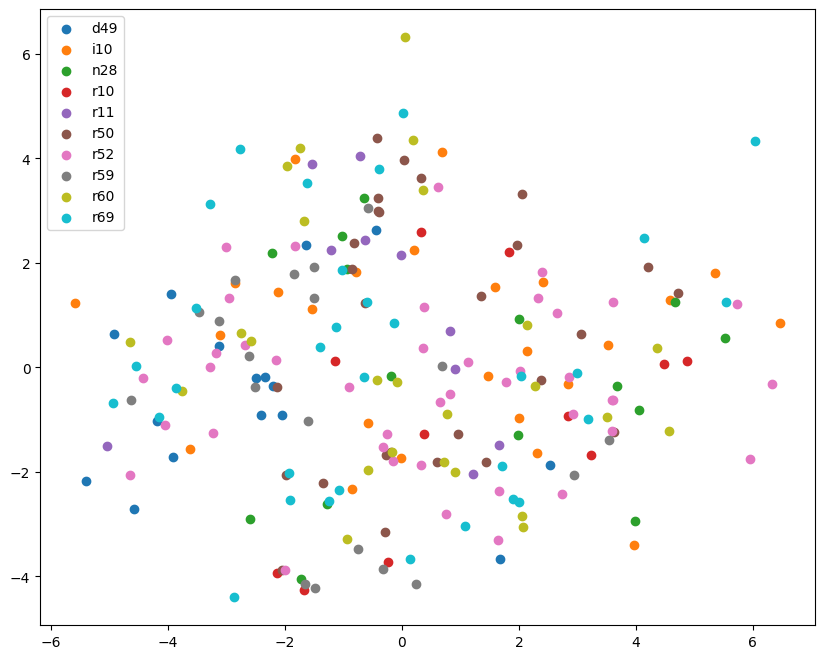

In [58]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Perform t-SNE dimensionality reduction
tsne = PCA(n_components=2, random_state=42)
embeddings_tsne = tsne.fit_transform(np.asarray(X_t))

# Plot the t-SNE representation, coloring points by label
fig = plt.figure(figsize=(10, 8))

# Get unique labels from codigos
unique_labels = np.unique(df_filtered['codigos'].apply(lambda x: x[0]))  # Ensure unique labels

# Assign a color to each unique label
colors = plt.cm.tab10.colors[:len(unique_labels)]

# Iterate over unique labels
for label, color in zip(unique_labels, colors):
    # Get indices of data points with current label
    indices = df_filtered[df_filtered['codigos'].apply(lambda x: x[0]) == label].index
    # Plot t-SNE points for data points with current label, colored by label
    plt.scatter(embeddings_tsne[indices, 0], embeddings_tsne[indices, 1], c=[color], label=label)


# Add legend
plt.legend()

# Show plot
plt.show()


In [47]:
df_filtered['codigos']

2      [n28]
4      [i10]
8      [n28]
10     [n28]
12     [d49]
       ...  
548    [i10]
551    [r52]
556    [r52]
557    [r69]
560    [r69]
Name: codigos, Length: 222, dtype: object

In [48]:
cat

[['r52'],
 ['r69'],
 ['r50'],
 ['i10'],
 ['r60'],
 ['r59'],
 ['d49'],
 ['n28'],
 ['r10'],
 ['r11']]

In [38]:
df_filtered[df_filtered['codigos'] == ["i10"]]

ValueError: ('Lengths must match to compare', (222,), (1, 1))

In [41]:
df_filtered['codigos'].to_list()[0]

['n28']

## Modelos